In [1]:
#For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be),
#then give an example of what a true positive, true negative, type I and type II errors would look like.
#Note that some of the questions are intentionally phrased in a vague way. 
#It is your job to reword these as more precise questions that could be tested.

#Has the network latency gone up since we switched internet service providers?
#Is the website redesign any good?
#Is our television ad driving more sales?







Has the network latency gone up during the day since we switched internet service providers?



1a. Hnull: Has the network latency stayed the same or decreased during the day since we switched providers

Halternative: Network latency of current provider during the day > then the previous provider

True Positive: the network latency gone up during the day since we switched internet service providers.
True Negative: The network latency has stayed the same if not decreased during the day since switching providers
Type 1 error: The network latency did not stay the same and or decreased during the day when in actuality the latency did decrease during the day
Type 2 error: The network latency has stayed the same if not decreased during the day is false but continue to believe that the  latency stayed the same and decreased during the day.




Is the website redesign lacking updated content


2a Hnull: The website redesign does not have updated content

Halternative: The website redesign is fully updated.

True Positive: The website redesign updates every second
True Negative: The website redesign does not contain any new data

Type 1 error: The website redesign is fully updated however the website launch redesign did not have updated content
Type 2 error: The website does not have updated content, however the the content is up to date



#Is our television ad driving more sales with the age group 50+

Hnull: tele ad driving less sales with age group <=50

Halternative: tele ad driving more sales with the 50+ group

True Positive: tele ad driving more sales with the 50+ group

True Negative: tele ad driving less sales with age group <=50


Type 1 error: tele ad driving less sales with age group <=50 when the data says it actually drove more sales
Type 2 error: tele add driving less sales with the age group <=50 and continued to target age groups <= 50









In [2]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
## Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
##A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
##A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
##Use a .05 level of significance.

## office 1 is significantly faster then office 2 to sell homes
## office 1 is not signifcantly faster then office 2 to sell homes

from math import sqrt

alpha = .05

office1sample = 40
office1mean = 90
office1std = 15


office2sample = 50
office2mean = 100 
office2std = 20

deg_free = office1sample + office2sample - 2## degrees of freedom from 2 samples

s_p = sqrt(((office1sample-1) * office1std**2 +(office2sample-1) * office2std**2)/(deg_free))## this is the t-test
s_p





17.956702977389302

In [4]:
standard_error = se = sqrt(office1std**2 / office1sample + office2std**2 / office2sample)

t = (office1mean - office2mean) / (s_p * sqrt(1/office1sample + 1/office2sample))
t

-2.6252287036468456

In [5]:
p = stats.t(deg_free).cdf(t) * 2
p

0.01020985244923939

In [6]:
print(f't = {t:.5f}')
print(f'p = {p:.5f}')

t = -2.62523
p = 0.01021


In [7]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  False


In [8]:
t,p = stats.ttest_ind_from_stats(mean1=90,std1=15, nobs1 = 40, mean2=100, std2 = 20, nobs2=50, equal_var=False)

In [9]:
t,p

(-2.7091418459143854, 0.00811206270346016)

In [10]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  False


In [11]:
if p < alpha:
    print("Reject null hypothesis, there is evidence to suggest there is a difference in sales")
else: 
    print("Fail to reject null hypothesis")

Reject null hypothesis, there is evidence to suggest there is a difference in sales


In [12]:
##Load the mpg dataset and use it to answer the following questions:

##Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
##Are compact cars more fuel-efficient than the average car?
##Do manual cars get better gas mileage than automatic cars?


df = data('mpg')
df


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [13]:
##Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

## Ho: "There is no difference in fuel efficiency between cars made in 1999 and 2008.
## Ha: "There is a difference in fuel efficiency between cars made in 1999 and 2008."

df.info()
df.head()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [14]:
df['fuel_efficiency'] = (df.hwy + df.cty)/2
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [15]:
cars_2008 = df[df.year==2008].fuel_efficiency
cars_1999 = df[df.year==1999].fuel_efficiency

In [16]:
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [17]:
t, p = stats.ttest_ind(cars_2008, cars_1999)
t, p

(-0.21960177245940962, 0.8263744040323578)

In [18]:
#Since p is greater than our alpha, we fail to reject the null hypothesis.

p < alpha

False

In [19]:
##Are compact cars more fuel-efficient than the average car?

##H0: Compact cars are as fuel efficient as all cars
##Ha: Compact cars are more fuel efficient than average cars. This will be a one tailed, 1 sample t test




In [20]:
df = df.rename(columns = {'class': "car_type"})
compact_fuel = df[df.car_type=="compact"].fuel_efficiency

In [21]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [22]:

def car_type(x):
    if x =="compact":
        return "compact"
    else:
        return "not_compact"
df["is_compact"] = df.car_type.apply(car_type)

average_fuel = df[df.is_compact =="not_compact"].fuel_efficiency

In [23]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,not_compact
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,not_compact
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,not_compact
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,not_compact


In [24]:
overall_mean = df.fuel_efficiency

In [25]:
t,p = stats.ttest_ind(compact_fuel, overall_mean, alternative="greater")
t,p

(5.260311926248542, 1.4342273079064686e-07)

In [26]:
p < alpha

True

In [27]:
##reject null hypothesis.

In [28]:
##Do manual cars get better gas mileage than automatic cars?


df.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact


In [29]:
def transmission(x):
    startswith = 'a'
    if x[0] in startswith:
        return "auto"
    else: 
        return "manual"

In [30]:
df["transmission"] = df.trans.apply(transmission)


In [31]:
auto = df[df.transmission =="auto"]
manual = df[df.transmission=="manual"]

df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,car_type,fuel_efficiency,is_compact,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,compact,auto


In [32]:
t,p=stats.ttest_ind(manual.fuel_efficiency,auto.fuel_efficiency, equal_var=False)

In [33]:
t,p/2,alpha

(4.443514012903071, 8.976124499958965e-06, 0.05)

In [34]:
#Since p is less than alpha, we fail to reject the null hypothesis.

In [35]:
##Use the telco_churn data. 
##Does tenure correlate with monthly charges? Total charges? 
##What happens if you control for phone and internet service?


telco_churn_df = pd.read_csv('Cust_Churn_Telco.csv')

In [36]:
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
telco_churn_df.dropna()## drop the null values
telco_churn_df_nn = telco_churn_df.dropna()


In [38]:
##Ho: There is no linear relationship between tenure and monthly charges 
##Ha: There is a linear relationship between tenure and monthly charges

In [39]:
x = telco_churn_df['tenure']
y = telco_churn_df['MonthlyCharges']

(100.0, 123.775)

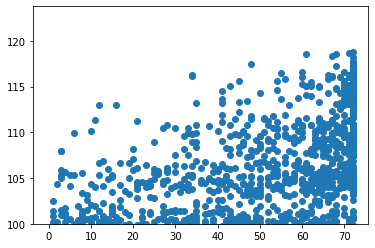

In [40]:
plt.scatter(x,y)## produce a scatter plot
plt.ylim(100)

In [41]:
alpha = .05
corr, p = stats.pearsonr(x, y)
corr, p

#There is a weak correlation between tenure and monthly charges.

(0.24789985628615005, 4.0940449915016345e-99)

In [42]:
x = telco_churn_df_nn.tenure
y = telco_churn_df_nn.TotalCharges

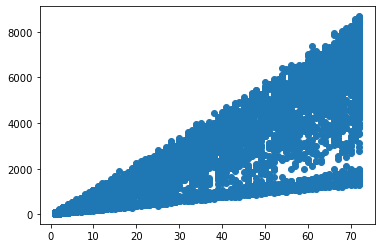

In [43]:
plt.scatter(x,y)

In [44]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.825880460933202, 0.0)

In [45]:
#Strong positive correlation, we reject the null hypothesis. 
##Significant evidence to suggest there is a linear relationship between tenure and total charges

In [46]:
##What happens if you control for phone and internet service?

x = telco_churn_df_nn.TotalCharges.where(telco_churn_df_nn.PhoneService == "Yes")## change the 'No' to 'Yes' in the phone service column
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.PhoneService== "Yes")

telco_churn_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


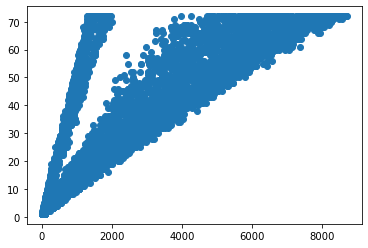

In [47]:
plt.scatter(x,y)

In [48]:
x= x.dropna()
y= y.dropna()

In [49]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8298393210699408, 0.0)

In [50]:
###Reject null hypothesis, because p is lower than alpha = 0.05. There is evidence to suggest that there is a linear relationship between total charges of customers with phone service and tenure.

In [51]:
x = telco_churn_df_nn.TotalCharges.where(telco_churn_df_nn.PhoneService == "No")
y = telco_churn_df_nn.tenure.where(telco_churn_df_nn.PhoneService== "No")

In [52]:
x = x.dropna()
y = y.dropna()

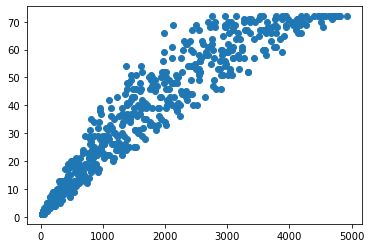

In [53]:
plt.scatter(x,y)

In [54]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.9534228506954516, 0.0)

In [55]:
#Reject null hypothesis, there is evidence to suggest there is a linear relationship between customer total charges with no phone service, and tenure. 
##Strong positive correlation, significant p value.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from env import host, username, password
from pydataset import data


In [57]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
def get_db_url(username,password,host,db_name):
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'
    
emp_url = get_db_url(username,password,host, 'employees')

In [58]:
pd.read_sql('select * from employees limit 5', emp_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [59]:
query = '''
    select * 
    from employees 
    join salaries using (emp_no) 
    where to_date > curdate()'''
employees = pd.read_sql(query, url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [60]:
##Is there a relationship between how long an employee has been with the company and their salary?

In [61]:
from datetime import date
date.today()

datetime.date(2021, 8, 11)

In [62]:
employees['tenure_in_days']= (date.today() - employees['hire_date']).dt.days

In [63]:
employees.head(100)

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,tenure_in_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12830
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,13047
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12767
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12672
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11656
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,59755,2001-08-02,9999-01-01,11758
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,88070,2002-02-07,9999-01-01,11870
7,10009,1952-04-19,Sumant,Peac,F,1985-02-18,94409,2002-02-14,9999-01-01,13323
8,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,80324,2001-11-23,9999-01-01,11675
9,10012,1960-10-04,Patricio,Bridgland,M,1992-12-18,54423,2001-12-16,9999-01-01,10463


In [64]:
x = employees.tenure_in_days
y = employees.salary


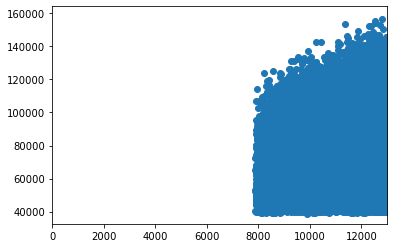

In [65]:
plt.xlim(0,13000)
plt.scatter(x,y)

In [66]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.3064625613186077, 0.0)

In [67]:
#There is a weak positive correlation between salary and tenure of the employee

In [68]:
##Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [69]:
titles_df = pd.read_sql('select * from titles', emp_url)

In [70]:
count_titles_df=titles_df.groupby('emp_no').count()

In [71]:
titles_and_count = pd.merge(titles_df, count_titles_df, how = 'left', on='emp_no')

In [72]:
titles_and_count.head(30)

,emp_no,title_x,from_date_x,to_date_x,title_y,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,1,1
1,10002,Staff,1996-08-03,9999-01-01,1,1,1
2,10003,Senior Engineer,1995-12-03,9999-01-01,1,1,1
3,10004,Engineer,1986-12-01,1995-12-01,2,2,2
4,10004,Senior Engineer,1995-12-01,9999-01-01,2,2,2
5,10005,Senior Staff,1996-09-12,9999-01-01,2,2,2
6,10005,Staff,1989-09-12,1996-09-12,2,2,2
7,10006,Senior Engineer,1990-08-05,9999-01-01,1,1,1
8,10007,Senior Staff,1996-02-11,9999-01-01,2,2,2
9,10007,Staff,1989-02-10,1996-02-11,2,2,2


In [73]:
titles_and_count['tenure_in_days']= (date.today() - titles_and_count['from_date_x']).dt.days

In [74]:
titles_and_count.head(50)

,emp_no,title_x,from_date_x,to_date_x,title_y,from_date_y,to_date_y,tenure_in_days
0,10001,Senior Engineer,1986-06-26,9999-01-01,1,1,1,12830
1,10002,Staff,1996-08-03,9999-01-01,1,1,1,9139
2,10003,Senior Engineer,1995-12-03,9999-01-01,1,1,1,9383
3,10004,Engineer,1986-12-01,1995-12-01,2,2,2,12672
4,10004,Senior Engineer,1995-12-01,9999-01-01,2,2,2,9385
5,10005,Senior Staff,1996-09-12,9999-01-01,2,2,2,9099
6,10005,Staff,1989-09-12,1996-09-12,2,2,2,11656
7,10006,Senior Engineer,1990-08-05,9999-01-01,1,1,1,11329
8,10007,Senior Staff,1996-02-11,9999-01-01,2,2,2,9313
9,10007,Staff,1989-02-10,1996-02-11,2,2,2,11870


In [75]:
x = titles_and_count.tenure_in_days
y = titles_and_count.title_y

In [76]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.0765805523044214, 0.0)

In [77]:
# no correlatino between the number of titles and the number of days at the company

In [78]:
#Use the sleepstudy data. Is there a relationship between days and reaction time?

df = data('sleepstudy')

In [79]:
df.head(20)




,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


In [80]:
x = df.Days
y = df.Reaction

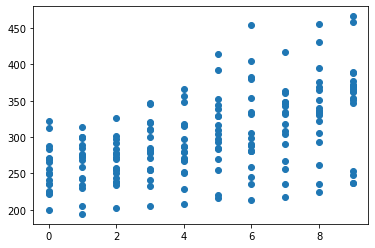

In [81]:
plt.scatter(x,y)

In [82]:
corr, p = stats.pearsonr(x,y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [83]:
#moderately positive relationship between days and reaction time

In [84]:
##Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

##Ho: Using a macbook and bieng a codeup student are independant of eachother
## Ha: '' dependant of eachother


In [91]:
a = .01

In [92]:
index = ['mac_user', 'not_mac_user']
columns = ['Codeup_student', 'Non_Codeup_student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()

In [93]:
observed

,Codeup_student,Non_Codeup_student
mac_user,49,20
not_mac_user,1,30


In [94]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [95]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [96]:
if p < a:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


In [97]:
#There is evidence to suggest that being a mac user and codeup student are not independent.

In [99]:
##Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them.
##Be sure to state your null and alternative hypotheses.

##Ho: Transmission and class type are independent. 
##Ha: Transmission and class type are not independent.

In [100]:
mpg_df = data('mpg')

In [104]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [117]:
mpg_df['transmission'] = mpg_df['trans'].str[:4]

In [115]:
mpg_df.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,au
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,ma
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,ma
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,au
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,au
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,ma
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,au
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,ma
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,au
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,ma


In [118]:
observed = pd.crosstab(mpg_df.transmission, mpg_df['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
transmission,,,,,,,
auto,2,24,29,11,20,16,55
manu,3,23,12,0,13,19,7


In [109]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [110]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 2 24 29 11 20 16 55]
 [ 3 23 12  0 13 19  7]]
---
Expected

[[ 3 31 27  7 22 23 41]
 [ 1 15 13  3 10 11 20]]
---

chi^2 = 33.7700
p     = 0.0000


In [111]:
if p < a:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis


In [113]:
#Reject null hypothesis, transmission and class type are not independent

In [119]:
##Use the data from the employees database to answer these questions:

##Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
##Is an employee's gender independent of whether or not they are or have been a manager?



In [133]:
## Is gender independant from sales
## Is gender dependant from sales


query = '''
    select * 
    from employees 
    join dept_emp using (emp_no)
    join departments using (dept_no)
    where to_date > curdate() and dept_name IN ('Sales', 'Marketing')'''
employees = pd.read_sql(query, url)
employees

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing
...,...,...,...,...,...,...,...,...,...,...
52538,d007,499966,1955-12-04,Mihalis,Crabtree,F,1985-06-13,1985-06-13,9999-01-01,Sales
52539,d007,499976,1963-08-20,Guozhong,Felder,M,1988-12-26,1988-12-26,9999-01-01,Sales
52540,d007,499980,1959-06-28,Gino,Usery,M,1991-02-11,1991-02-11,9999-01-01,Sales
52541,d007,499986,1952-07-22,Nathan,Ranta,F,1985-08-11,1985-08-11,9999-01-01,Sales


In [135]:
observed = pd.crosstab(employees.gender, employees.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [136]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [137]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 5864 14999]
 [ 8978 22702]]
---
Expected

[[ 5893 14969]
 [ 8948 22731]]
---

chi^2 = 0.3240
p     = 0.5692


In [138]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")


We fail to reject the null hypothesis


In [139]:
##gender independant from sales

In [140]:
##Is an employee's gender independent of whether or not they are or have been a manager?

In [141]:
## Ho: gender independant from a manager
## Ha gender dependant from manager

In [142]:
managers = pd.read_sql("""select emp_no from dept_manager""",url)
managers

,emp_no
0,110022
1,110039
2,110085
3,110114
4,110183
5,110228
6,110303
7,110344
8,110386
9,110420


In [143]:
employees = pd.read_sql("""select * from employees
""",url)

In [144]:
managers = managers.to_numpy()

In [145]:
def manager(emp_no):
    if emp_no in managers:
        return True
    else: 
        return False

In [146]:
employees['is_manager'] = employees.emp_no.apply(manager)

In [147]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,is_manager
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,False
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,False
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,False
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,False
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,False


In [148]:
observed = pd.crosstab(employees.gender, employees.is_manager)

In [149]:
observed


is_manager,False,True
gender,,
F,120038,13
M,179962,11


In [150]:
chi2, p ,degf, expected = stats.chi2_contingency(observed)

In [151]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[120038     13]
 [179962     11]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275


In [152]:
if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [ ]:
##gender and whether they have been a manager are independent